In [10]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import os
import numpy as np
import matplotlib.pyplot as plt
import sys
import json
import sys
import tensorflow as tf

import getpass
ui = getpass.getuser()
if ui == 'laura':
    p = '/home/laura'
elif ui == 'lauradriscoll':
    p = '/Users/lauradriscoll/Documents'

net = 'stepnet'
PATH_YANGNET = os.path.join(p,'code/multitask-nets',net) 

sys.path.insert(0, PATH_YANGNET)
from task import generate_trials, rule_name, rule_index_map, rules_dict
from network import Model, get_perf, FixedPoint_Model
import tools
from analysis import clustering, standard_analysis, variance
import numpy.random as npr
from tools_lnd import make_h_all, PC_axes, proximate_fp, calc_relevant_jacobian
from tools_lnd import make_dendro, gen_trials_from_model_dir, gen_X_from_model_dir, get_T_inds

In [11]:
def plot_training(m):

    model = FixedPoint_Model(m)
    with tf.Session() as sess:
        model.restore()
        hp = model.hp
    task_list = hp['rule_trains']

    fig = plt.figure(figsize=(5, 5))
    cmap=plt.get_cmap('Greys')
    fname = os.path.join(m, 'log.json')

    with open(fname, 'r') as f:
        log_all = json.load(f)
    for r in range(len(task_list)):
        c = cmap((r+1)/(len(task_list)+1))
        ax = fig.add_subplot(1,1,1)
        x = np.log(log_all['cost_'+task_list[r]])
        plt.plot(x,'-',c = c,alpha = .5)
        ax.set_xlabel('Training Step (x 1000)')
        ax.set_ylabel('Log Cost [for each task]')
    #     plt.ylim([-6,2])

    plt.title(m)
    plt.show()    

Overwrite sigma_rec with 0.000
0.0
Variables being optimized:
<tf.Variable 'rnn/leaky_rnn_cell/kernel:0' shape=(281, 256) dtype=float32_ref>
<tf.Variable 'rnn/leaky_rnn_cell/bias:0' shape=(256,) dtype=float32_ref>
<tf.Variable 'output/weights:0' shape=(256, 3) dtype=float32_ref>
<tf.Variable 'output/biases:0' shape=(3,) dtype=float32_ref>
Instructions for updating:
Use `tf.global_variables_initializer` instead.
INFO:tensorflow:Restoring parameters from /Users/lauradriscoll/Documents/data/rnn/multitask/stepnet/crystals/softplus/3_tasks/256_n_rnn/l2_w4_h5_fdgo_fdanti_delaygo/0_best/model.ckpt
Model restored from file: /Users/lauradriscoll/Documents/data/rnn/multitask/stepnet/crystals/softplus/3_tasks/256_n_rnn/l2_w4_h5_fdgo_fdanti_delaygo/0_best/model.ckpt
['fdgo', 'delaygo', 'fdanti', 'delayanti']
Variance saved at /Users/lauradriscoll/Documents/data/rnn/multitask/stepnet/crystals/softplus/3_tasks/256_n_rnn/l2_w4_h5_fdgo_fdanti_delaygo/0_best/variance_rule.pkl
Variance saved at /Users/l

/Users/lauradriscoll/anaconda2/envs/tensorflow/lib/python2.7/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


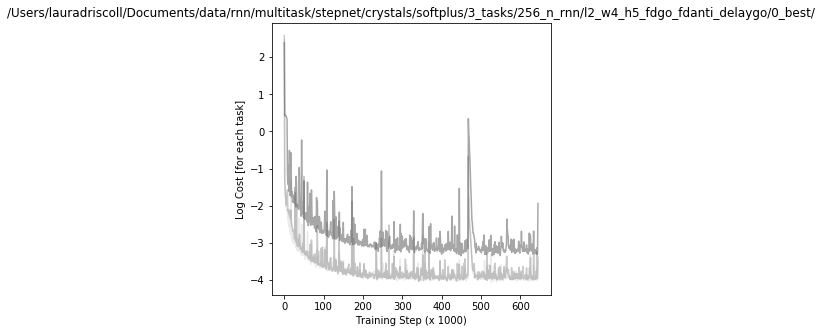

Choosing 7 clusters


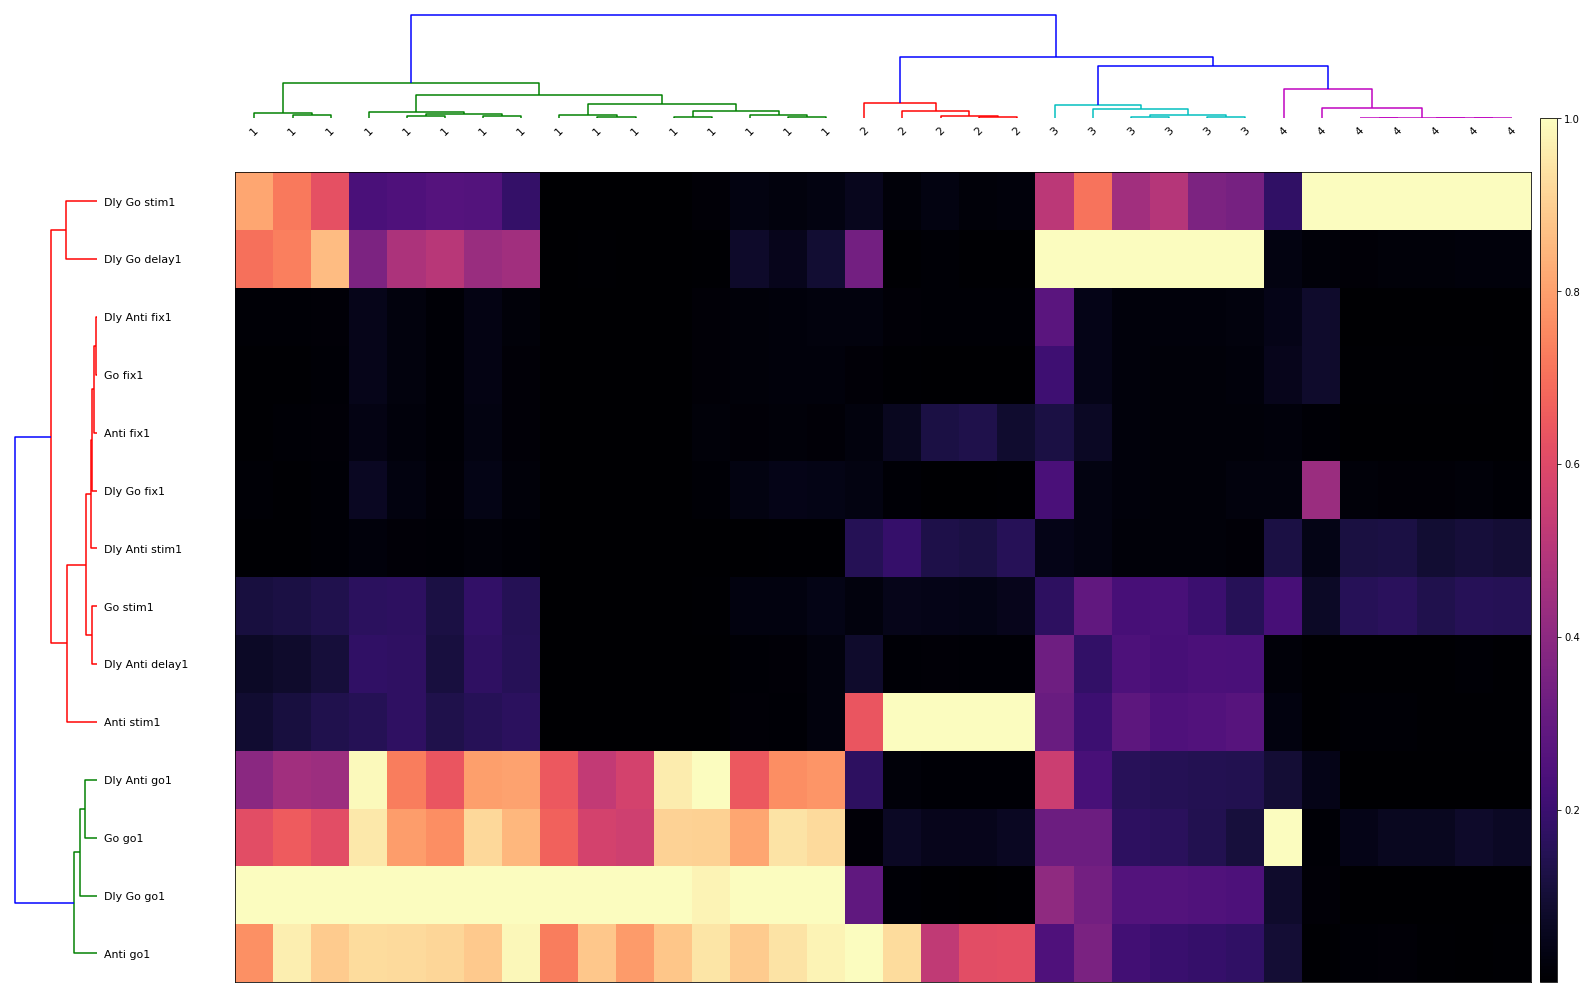

In [12]:
data_folder = '/Users/lauradriscoll/Documents/data/rnn/multitask/stepnet/crystals/softplus'
file_spec = '3_tasks/256_n_rnn/l2_w4_h5_fdgo_fdanti_delaygo/0_best/'
m = os.path.join(data_folder,file_spec)
variance.compute_variance(m,rules = ['fdgo','delaygo', 'fdanti', 'delayanti'])

plot_training(m)

make_dendro(m)

Overwrite sigma_rec with 0.000
0.0
INFO:tensorflow:Restoring parameters from /Users/lauradriscoll/Documents/data/rnn/multitask/stepnet/crystals/softplus/4_tasks/l2w0001_fdgo_fdanti_delaygo_delayanti/0/model.ckpt
Model restored from file: /Users/lauradriscoll/Documents/data/rnn/multitask/stepnet/crystals/softplus/4_tasks/l2w0001_fdgo_fdanti_delaygo_delayanti/0/model.ckpt


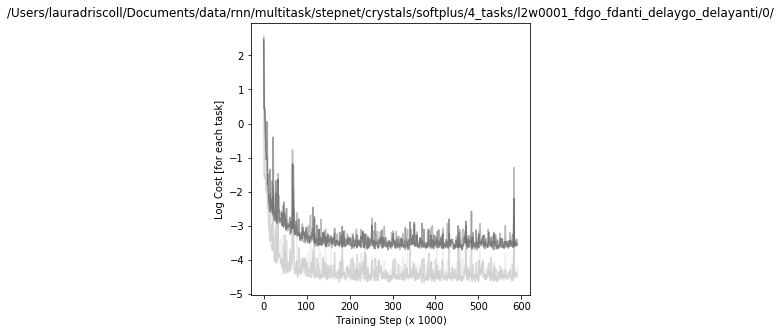

Choosing 12 clusters


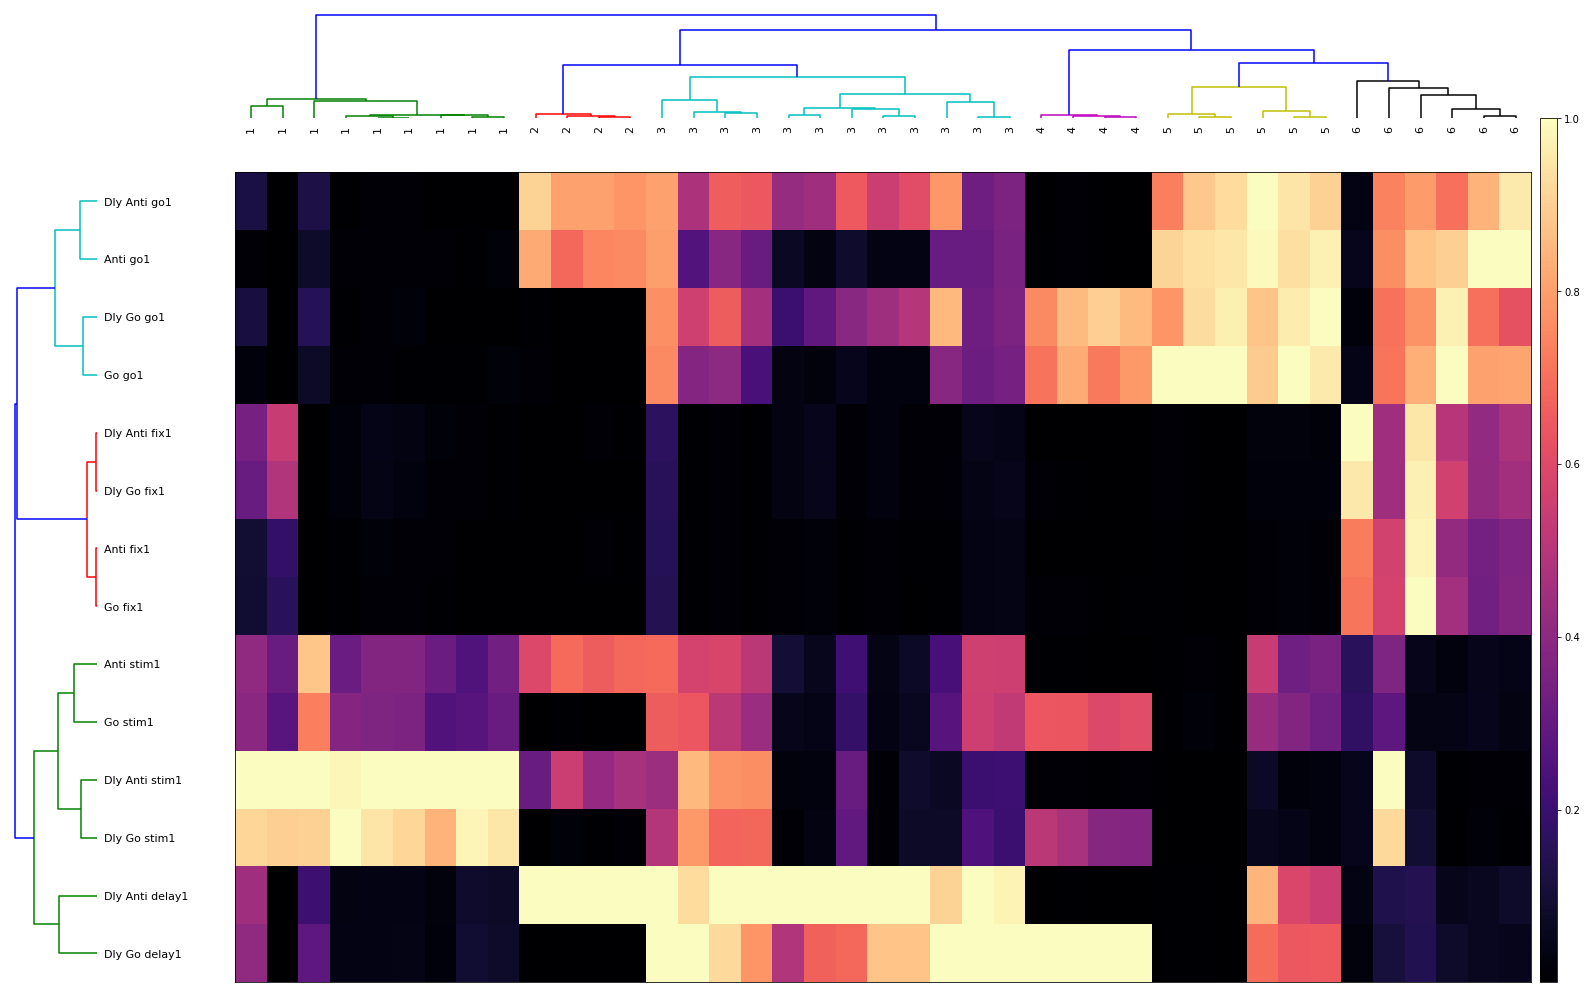

In [18]:
data_folder = '/Users/lauradriscoll/Documents/data/rnn/multitask/stepnet/crystals/softplus'
file_spec = '4_tasks/l2w0001_fdgo_fdanti_delaygo_delayanti/0/'
m = os.path.join(data_folder,file_spec)
plot_training(m)
# variance.compute_variance(m)
make_dendro(m)

In [27]:
data_folder = '/Users/lauradriscoll/Documents/data/rnn/multitask/stepnet/crystals/softplus'
file_spec = '4_tasks/l2w0001_fdgo_fdanti_delaygo_delayanti/0/'
D_file = 'lesion_fps_hierarchical_ward_max_d3/cluster_var.npz'
d = os.path.join(data_folder,file_spec,D_file)
cluster_var_4 = np.load(d)

[]

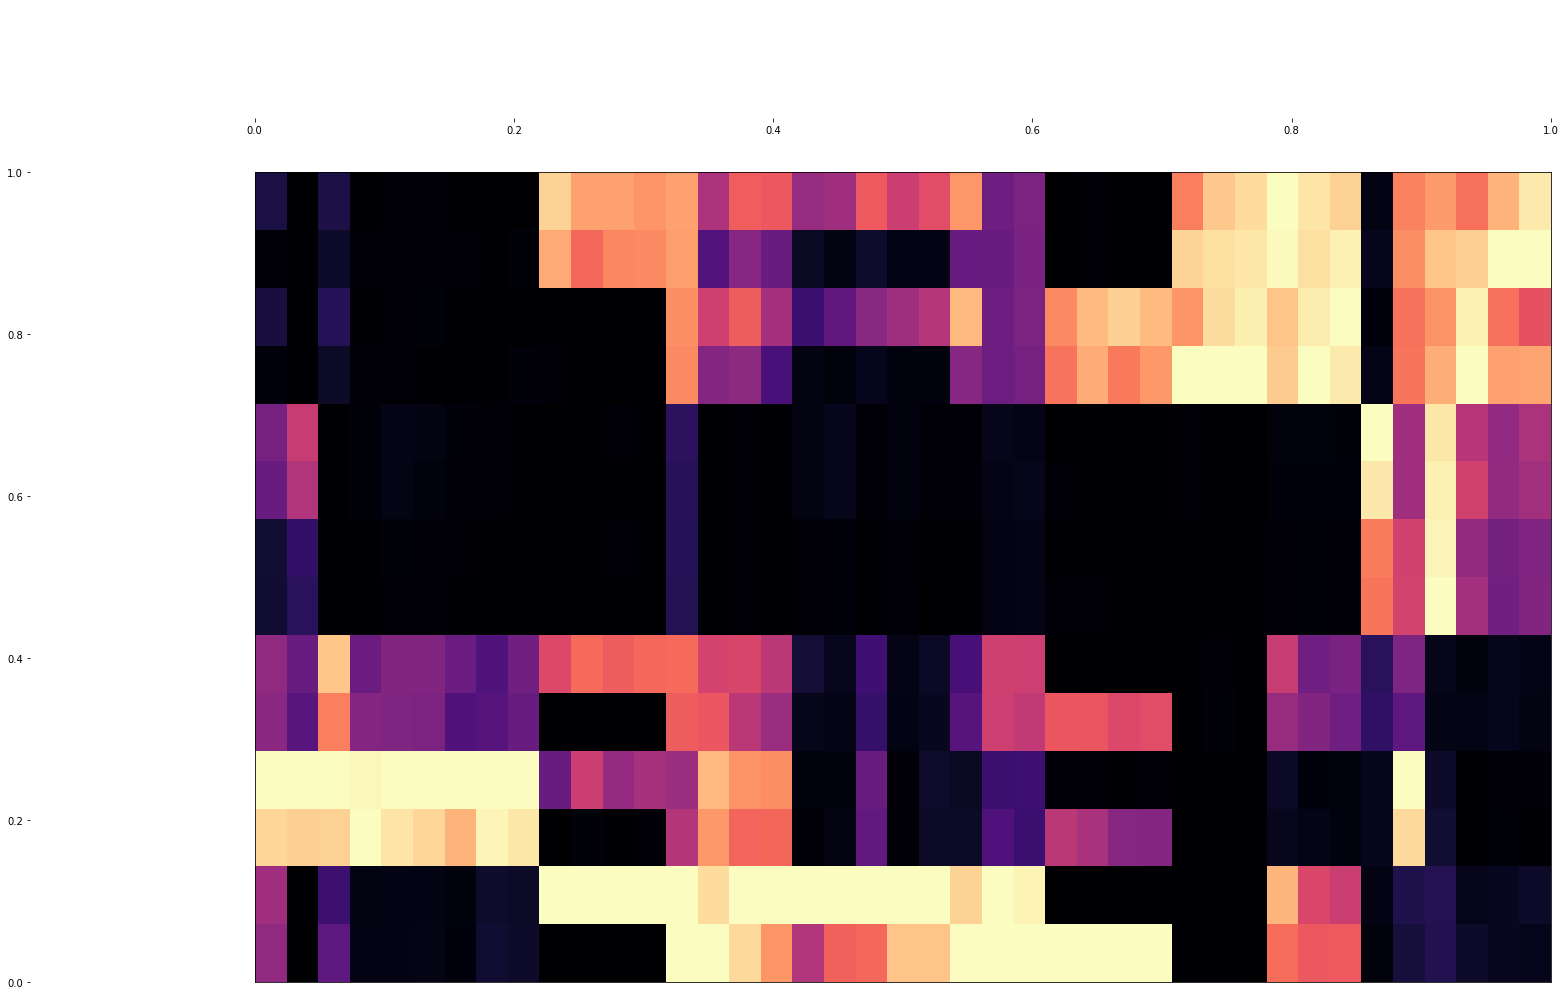

In [28]:
import pylab
tick_names = cluster_var_4['tick_names']
clusters = cluster_var_4['clusters']
D = cluster_var_4['D']
index_left = cluster_var_4['index_left']
index_top = cluster_var_4['index_top']


fig = pylab.figure(figsize=(24, 15))
axdendro = fig.add_axes([0.09,0.1,0.05,0.75])
axdendro.set_xticks([])
axdendro.spines['top'].set_visible(False)
axdendro.spines['right'].set_visible(False)
axdendro.spines['bottom'].set_visible(False)
axdendro.spines['left'].set_visible(False)

# Plot distance matrix.
axmatrix = fig.add_axes([0.22,0.1,0.75,0.75])
tick_names_sorted = [tick_names[i] for i in index_left]

# cel_num = [CA.ind_active[x] for x in index_top]
axdendro_top = fig.add_axes([0.22,.9,0.75,0.1])
axdendro_top.set_yticks([])
axdendro_top.spines['top'].set_visible(False)
axdendro_top.spines['right'].set_visible(False)
axdendro_top.spines['bottom'].set_visible(False)
axdendro_top.spines['left'].set_visible(False)

clusters_sorted = clusters[index_top]
im = axmatrix.matshow(D, aspect='auto', origin='lower',cmap='magma')
axmatrix.set_xticks([])
axmatrix.set_yticks([])

In [29]:
data_folder = '/Users/lauradriscoll/Documents/data/rnn/multitask/stepnet/crystals/softplus'
file_spec = '3_tasks/256_n_rnn/l2_w4_h5_fdgo_fdanti_delaygo/0_best/'
D_file = 'lesion_fps_hierarchical_ward_max_d3/cluster_var.npz'
d = os.path.join(data_folder,file_spec,D_file)
cluster_var_3_best = np.load(d)

In [69]:
file_spec = 'transfer_learn/start_from_best/1_tasks/256_n_rnn/l2_w4_h0_delayanti/0/'
D_file = 'lesion_fps_hierarchical_ward_max_d3/cluster_var.npz'
d = os.path.join(data_folder,file_spec,D_file)
cluster_var_4_best = np.load(d)

In [73]:
len(cluster_var_4_best['index_top'])

34

In [78]:
[np.argwhere(cluster_var_4_best['index_top']==ind)[0][0] for ind in cluster_var_3_best['index_top']]

[19,
 18,
 20,
 29,
 32,
 31,
 30,
 28,
 6,
 4,
 2,
 1,
 5,
 3,
 7,
 21,
 17,
 8,
 22,
 9,
 10,
 11,
 15,
 12,
 0,
 14,
 13,
 16,
 27,
 23,
 25,
 26,
 33,
 24]

In [91]:
def plot_dendro_reorder(cvar_orig, cvar_ref, reorder_top = []):

    reorder = [np.argwhere(cvar_orig['tick_names']==name)[0][0] for name in cvar_ref['tick_names']]
    D = cvar_orig['D']
        
    fig = pylab.figure(figsize=(10, 3))
    axmatrix = fig.add_axes([0,0,1,1])
    im = plt.imshow(D[reorder,:],cmap='magma')
    axmatrix.set_xticks([])
    axmatrix.set_yticks(range(len(reorder)))
    axmatrix.set_yticklabels(cvar_ref['tick_names'])
    axmatrix.set_xlabel('Cells')
    plt.colorbar()

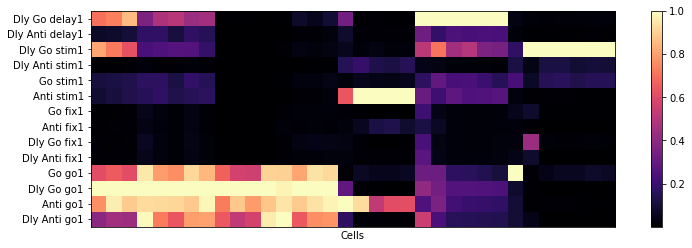

In [92]:
plot_dendro_reorder(cluster_var_3_best, cluster_var_4)

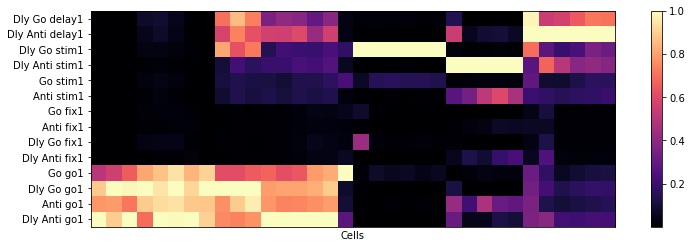

In [93]:
plot_dendro_reorder(cluster_var_4_best, cluster_var_4)

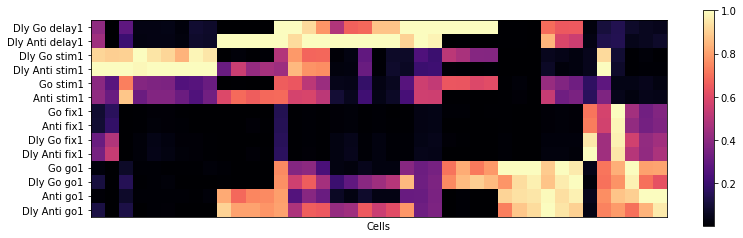

In [68]:
plot_dendro_reorder(cluster_var_4, cluster_var_4)